In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import json
from pathlib import Path
from scipy import stats

In [3]:
# Store filepaths into variable
flight_data_csv = "Flight_on_time_HIX.csv"

In [4]:
# Load Flight Data
flight_data_df = pd.read_csv(flight_data_csv)
flight_data_df.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier


In [5]:
# Define time bins and labels to categorize scheduled arrival and departure times into time frames
time_bins = [0, 600,1200, 1800,2400]
time_labels = ["Night", "Morning", "Afternoon", "Evening"]


In [6]:
# Create a new column 'Arrival_Time_Frame' and categorize scheduled arrival times
flight_data_df['Arrival_Time_Frame'] = pd.cut(flight_data_df['Scheduled_Arrival_Time'], bins=time_bins, labels=time_labels, right=False)
flight_data_df

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Arrival_Time_Frame
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,Night
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,Morning
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,Night
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,Night
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65664,NR,2309,GCESHO,12/31/2019,LWI,HIX,1846,2310,2308,0,19,2327,508,505,0,3,502,NaN,Night
65665,YJ,2760,GHEUSF,12/31/2019,MGU,HIX,1011,2328,2324,0,14,2338,131,110,0,11,59,NaN,Night
65666,TR,1610,GBFSNO,12/31/2019,ERR,HIX,1744,2340,13,33,15,28,541,624,43,9,615,LateAircraft,Night
65667,NR,1605,GBHPZC,12/31/2019,LDZ,HIX,1781,2355,2355,0,10,5,550,545,0,3,542,NaN,Night


In [7]:
# Create a new column 'Departure_Time_Frame' and categorize scheduled departure times
flight_data_df['Departure_Time_Frame'] = pd.cut(flight_data_df['Scheduled_Departure_Time'], bins=time_bins, labels=time_labels, right=False)


flight_data_df

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Arrival_Time_Frame,Departure_Time_Frame
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft,Night,Night
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN,Morning,Night
2,RO,4754,GHHWLL,12/1/2019,HIX,IZN,413,10,10,0,15,25,242,227,0,5,222,NaN,Night,Night
3,XM,5604,GBGWFC,12/1/2019,HIX,IZU,130,10,44,34,34,118,111,155,44,4,151,Weather,Night,Night
4,XM,5612,GBISBC,12/1/2019,HIX,LKF,258,10,234,144,26,300,132,358,146,6,352,Carrier,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65664,NR,2309,GCESHO,12/31/2019,LWI,HIX,1846,2310,2308,0,19,2327,508,505,0,3,502,NaN,Night,Evening
65665,YJ,2760,GHEUSF,12/31/2019,MGU,HIX,1011,2328,2324,0,14,2338,131,110,0,11,59,NaN,Night,Evening
65666,TR,1610,GBFSNO,12/31/2019,ERR,HIX,1744,2340,13,33,15,28,541,624,43,9,615,LateAircraft,Night,Evening
65667,NR,1605,GBHPZC,12/31/2019,LDZ,HIX,1781,2355,2355,0,10,5,550,545,0,3,542,NaN,Night,Evening


In [8]:
# Calculate quartiles and IQR
Q1 = flight_data_df['Arrival_Delay_Minutes'].quantile(0.25)
Q3 = flight_data_df['Arrival_Delay_Minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers in a new column
flight_data_df['Is_Outlier'] = flight_data_df['Arrival_Delay_Minutes'].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')

# Remove outliers
clean_data_df = flight_data_df[flight_data_df['Is_Outlier'] == 'No']

# Filter out rows with 0 arrival delay minutes
arrival_delay_df  = clean_data_df[clean_data_df['Arrival_Delay_Minutes'] > 0]

# Filter out rows with 0 departure delay minutes
departure_delay_df  = clean_data_df[clean_data_df['Departure_Delay_Minutes'] > 0]

# Separate filtering is performed to exclude cases where there may be a delay in arrival,
#but not in departure, or vice versa. This ensures more accurate analysis of delays.

In [9]:
# Group the data by 'Departure_Time_Frame' and calculate the average departure delay as well as count the frequency
average_dep_delay_by_timeframe = departure_delay_df.groupby('Departure_Time_Frame')['Departure_Delay_Minutes'].mean()
dep_delay_frequency_by_timeframe = departure_delay_df.groupby('Departure_Time_Frame')['Departure_Delay_Minutes'].count()

# Group the data by 'Arrival_Time_Frame' and calculate the average arrival delay as well as count the frequency
average_ariv_delay_by_timeframe = arrival_delay_df.groupby('Arrival_Time_Frame')['Arrival_Delay_Minutes'].mean()
ariv_delay_frequency_by_timeframe = arrival_delay_df.groupby('Arrival_Time_Frame')['Arrival_Delay_Minutes'].count()

In [10]:
# Group the data by both 'Arrival_Time_Frame' and 'Delay_Reason', and count the frequency of each reason

ariv_delay_reason_counts = arrival_delay_df.groupby(['Arrival_Time_Frame', 'Delay_Reason'])['Delay_Reason'].count()
ariv_delay_reason_counts = ariv_delay_reason_counts.reset_index(name='Counts')
ariv_primary_reasons_by_timeframe = ariv_delay_reason_counts.groupby('Arrival_Time_Frame').apply(lambda x: x.loc[x['Counts'].idxmax()])
print(ariv_primary_reasons_by_timeframe)


                   Arrival_Time_Frame Delay_Reason  Counts
Arrival_Time_Frame                                        
Night                           Night          NAS      40
Morning                       Morning          NAS     668
Afternoon                   Afternoon          NAS     629
Evening                       Evening          NAS     605


In [11]:
# Group the data by both 'Departure_Time_Frame' and 'Delay_Reason', and count the frequency of each reason
dep_delay_reason_counts = departure_delay_df.groupby(['Departure_Time_Frame', 'Delay_Reason'])['Delay_Reason'].count()
dep_delay_reason_counts = dep_delay_reason_counts.reset_index(name='Counts')
dep_primary_reasons_by_timeframe = dep_delay_reason_counts.groupby('Departure_Time_Frame').apply(lambda x: x.loc[x['Counts'].idxmax()])
print(dep_primary_reasons_by_timeframe)





                     Departure_Time_Frame  Delay_Reason  Counts
Departure_Time_Frame                                           
Night                               Night       Carrier      27
Morning                           Morning       Carrier     330
Afternoon                       Afternoon  LateAircraft     449
Evening                           Evening  LateAircraft     247


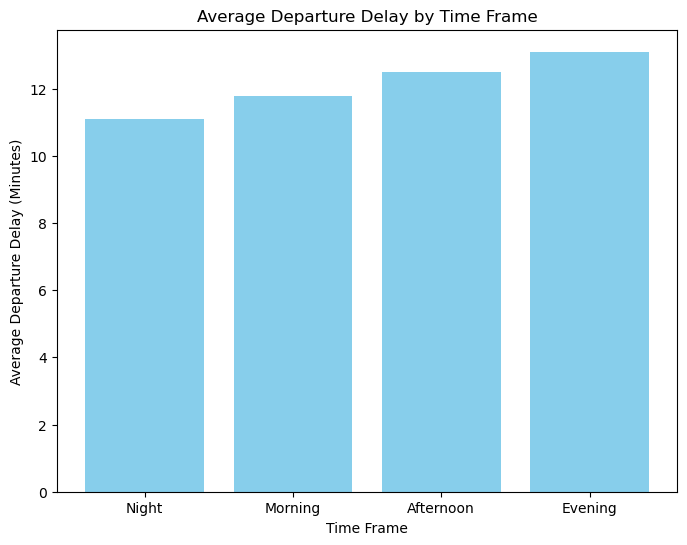

In [12]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
avg_delay = plt.bar(average_dep_delay_by_timeframe.index, average_dep_delay_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Average Departure Delay (Minutes)")
plt.title("Average Departure Delay by Time Frame")

# Show the plot
plt.show()

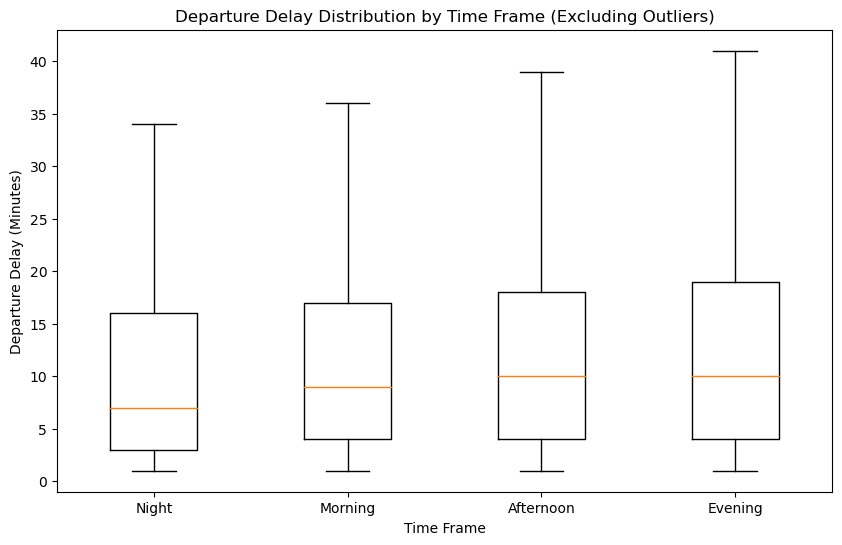

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot([departure_delay_df[departure_delay_df['Departure_Time_Frame'] == time_frame]['Departure_Delay_Minutes'] for time_frame in time_labels],
            labels=time_labels, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Time Frame")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Departure Delay Distribution by Time Frame (Excluding Outliers)")
plt.show()

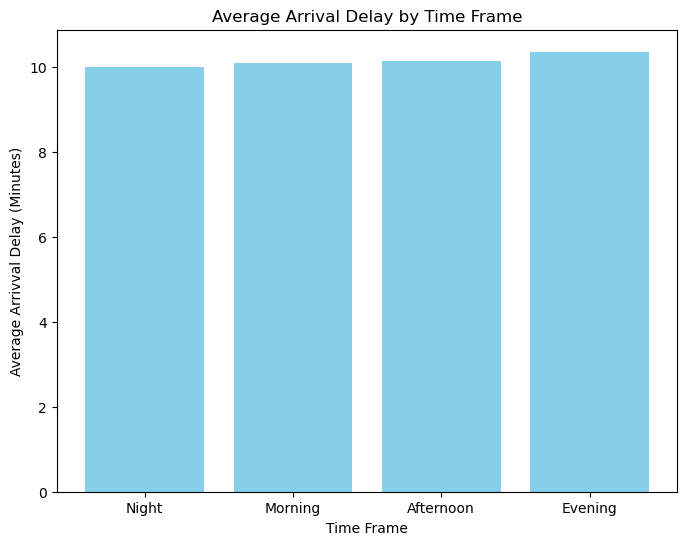

In [14]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
avg_delay = plt.bar(average_ariv_delay_by_timeframe.index, average_ariv_delay_by_timeframe, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Average Arrivval Delay (Minutes)")
plt.title("Average Arrival Delay by Time Frame")

# Show the plot
plt.show()

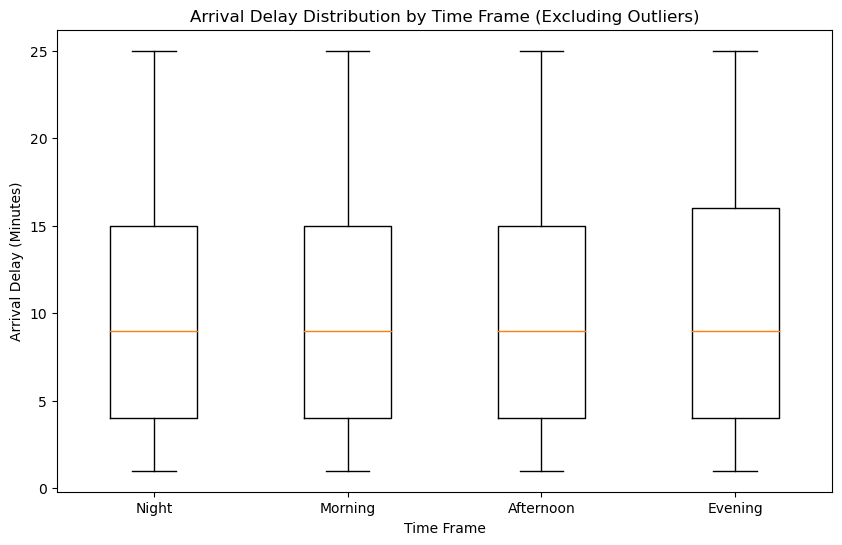

In [15]:

# Create box plots for arrival delay by time frame
plt.figure(figsize=(10, 6))
plt.boxplot([arrival_delay_df[arrival_delay_df['Arrival_Time_Frame'] == time_frame]['Arrival_Delay_Minutes'] for time_frame in time_labels],
            labels=time_labels, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Time Frame")
plt.ylabel("Arrival Delay (Minutes)")
plt.title("Arrival Delay Distribution by Time Frame (Excluding Outliers)")
plt.show()

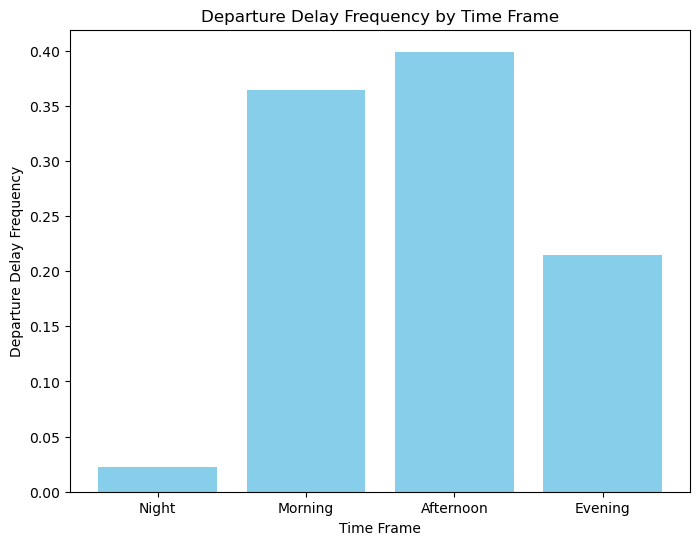

In [16]:
relative_dep_delay_frequency = dep_delay_frequency_by_timeframe / dep_delay_frequency_by_timeframe.sum()


# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
delay_reason = plt.bar(relative_dep_delay_frequency.index, relative_dep_delay_frequency, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Departure Delay Frequency")
plt.title("Departure Delay Frequency by Time Frame")

# Show the plot
plt.show()

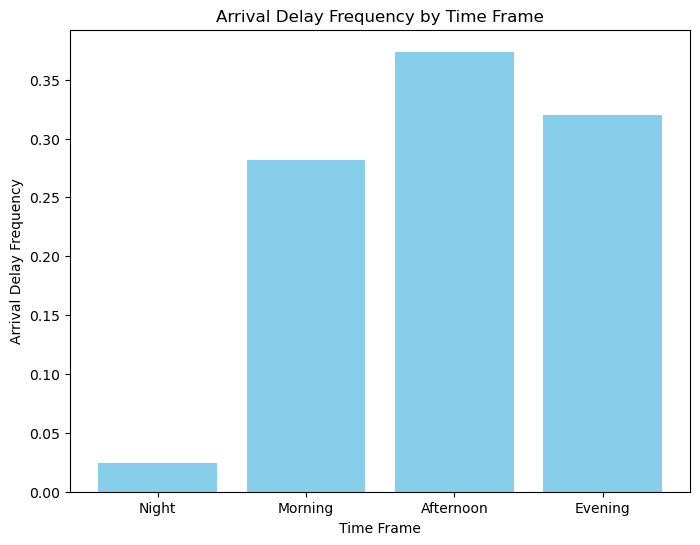

In [18]:
relative_ariv_delay_frequency = ariv_delay_frequency_by_timeframe / ariv_delay_frequency_by_timeframe.sum()


# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
delay_reason = plt.bar(relative_ariv_delay_frequency.index, relative_ariv_delay_frequency, color='skyblue')  # Create the bar chart

# Add labels and a title
plt.xlabel("Time Frame")
plt.ylabel("Arrival Delay Frequency")
plt.title("Arrival Delay Frequency by Time Frame")

# Show the plot
plt.show()

In [37]:
# Calculate the mean departure delay
mean_departure_delay = flight_data_df['Departure_Delay_Minutes'].mean()

# Calculate the mean arrival delay
mean_arrival_delay = flight_data_df['Arrival_Delay_Minutes'].mean()

print("Mean Departure Delay:", mean_departure_delay)
print("Mean Arrival Delay:", mean_arrival_delay)


Mean Departure Delay: 16.243052277330246
Mean Arrival Delay: 325.9465501225845


,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,...,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,Arrival_Time_Frame,Departure_Time_Frame,Is_Outlier
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,...,46,616,624,8,27,557,NaN,Morning,Night,No
6,XM,5661,GBESAF,12/1/2019,HIX,EZN,552,10,14,4,...,38,206,219,13,11,208,NaN,Night,Night,No
7,CA,6526,GCDTFM,12/1/2019,TLM,HIX,977,10,22,12,...,40,259,252,0,10,242,NaN,Night,Night,No
10,NR,3535,GEKWHO,12/1/2019,HIX,LRN,1041,10,55,45,...,106,310,334,24,4,330,Carrier,Night,Night,No
11,NR,2895,GGFVEG,12/1/2019,HIX,UFM,867,10,29,19,...,50,325,336,11,4,332,NaN,Night,Night,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65641,FH,5049,GGJOWO,12/31/2019,HIX,TQI,122,2055,2133,38,...,2146,2248,2313,25,2,2311,LateAircraft,Evening,Evening,No
65649,CA,6386,GEGSFK,12/31/2019,HIX,LGC,174,2127,2130,3,...,2157,2232,2233,1,4,2229,NaN,Evening,Evening,No
65654,GB,2058,GGKRAY,12/31/2019,MGU,HIX,1011,2159,2204,5,...,2213,2348,2342,0,7,2335,NaN,Evening,Evening,No
65655,YJ,1421,GHDSSF,12/31/2019,FTI,HIX,1005,2200,2202,2,...,2213,5,2351,0,12,2339,NaN,Night,Evening,No


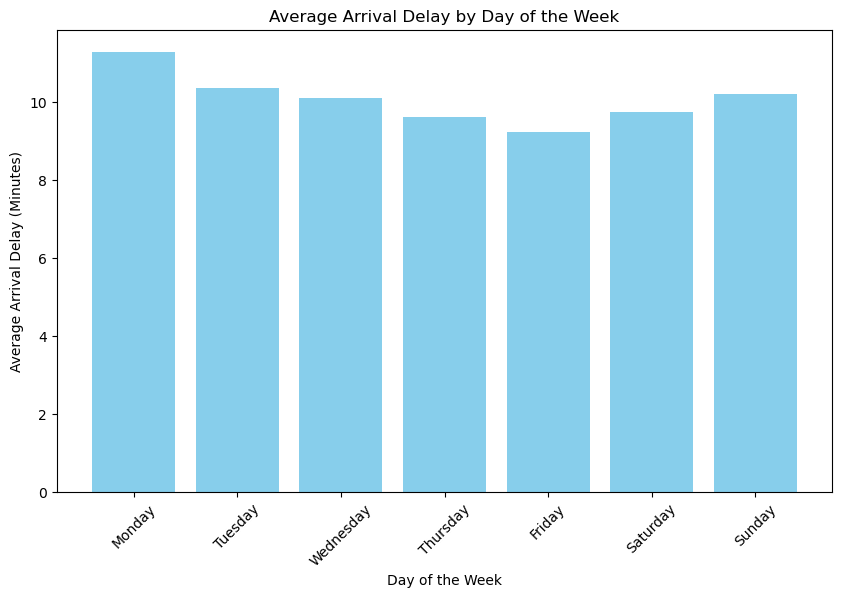

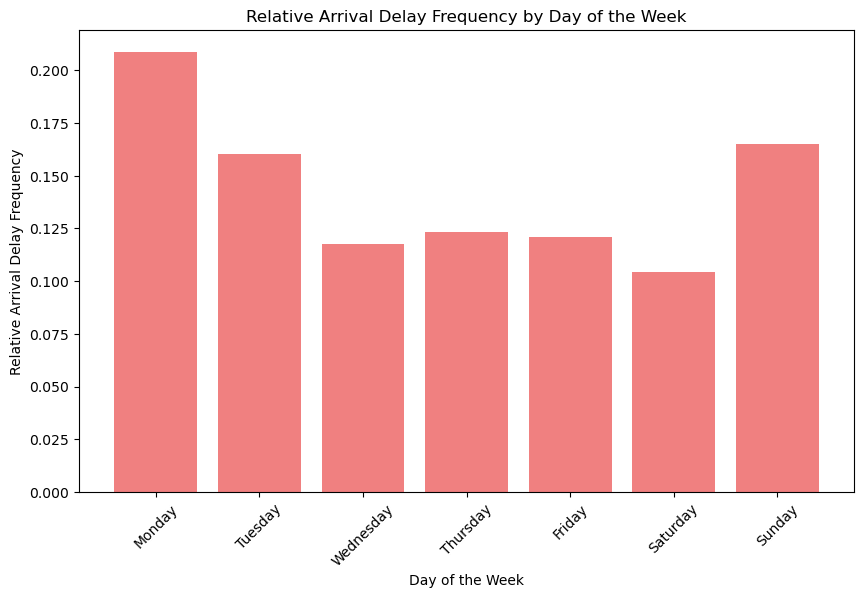

In [22]:
flight_data_df3 = arrival_delay_df.copy()

# Convert 'FlightDate' to datetime format
flight_data_df3['FlightDate'] = pd.to_datetime(flight_data_df3['FlightDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
flight_data_df3['DayOfWeek'] = flight_data_df3['FlightDate'].dt.dayofweek

# Group by day of the week and calculate average delay and delay frequency
day_of_week_stats3 = flight_data_df3.groupby('DayOfWeek')['Arrival_Delay_Minutes'].agg(['mean', 'count'])

# Rename the days of the week for better visualization
day_names3 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_stats3.index = [day_names3[i] for i in day_of_week_stats3.index]

# Plot average delay by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats3.index, day_of_week_stats3['mean'], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Average Arrival Delay (Minutes)")
plt.title("Average Arrival Delay by Day of the Week")
plt.xticks(rotation=45)
plt.show()

# Calculate relative arrival delay frequency by day of the week
relative_ariv_delay_frequency_days = day_of_week_stats3['count'] / day_of_week_stats3['count'].sum()

# Plot relative arrival delay frequency by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats3.index, relative_ariv_delay_frequency_days, color='lightcoral')
plt.xlabel("Day of the Week")
plt.ylabel("Relative Arrival Delay Frequency")
plt.title("Relative Arrival Delay Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()

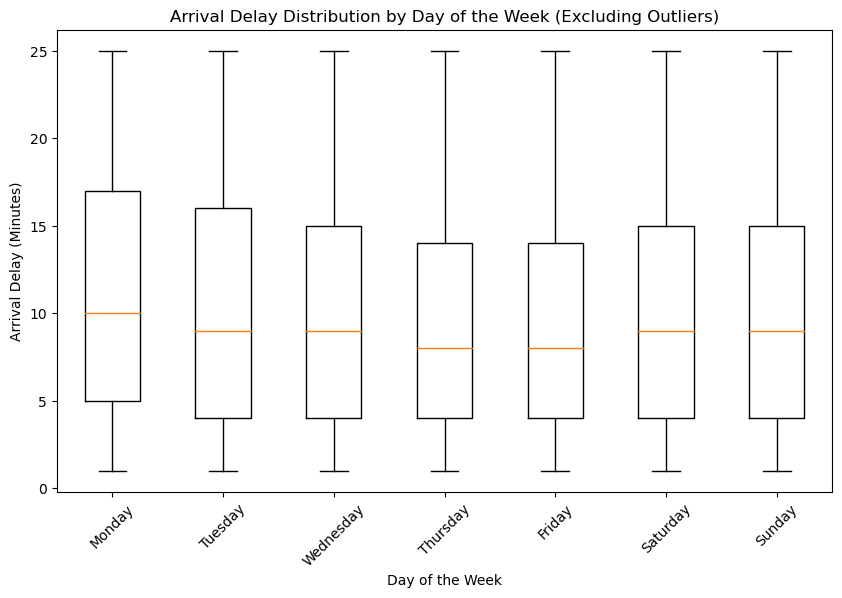

In [35]:

# Create box plots for arrival delay by day of the week
plt.figure(figsize=(10, 6))
plt.boxplot([flight_data_df3[flight_data_df3['DayOfWeek'] == i]['Arrival_Delay_Minutes'] for i in range(7)],
            labels=day_names, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Day of the Week")
plt.ylabel("Arrival Delay (Minutes)")
plt.title("Arrival Delay Distribution by Day of the Week (Excluding Outliers)")
plt.xticks(rotation=45)
plt.show()


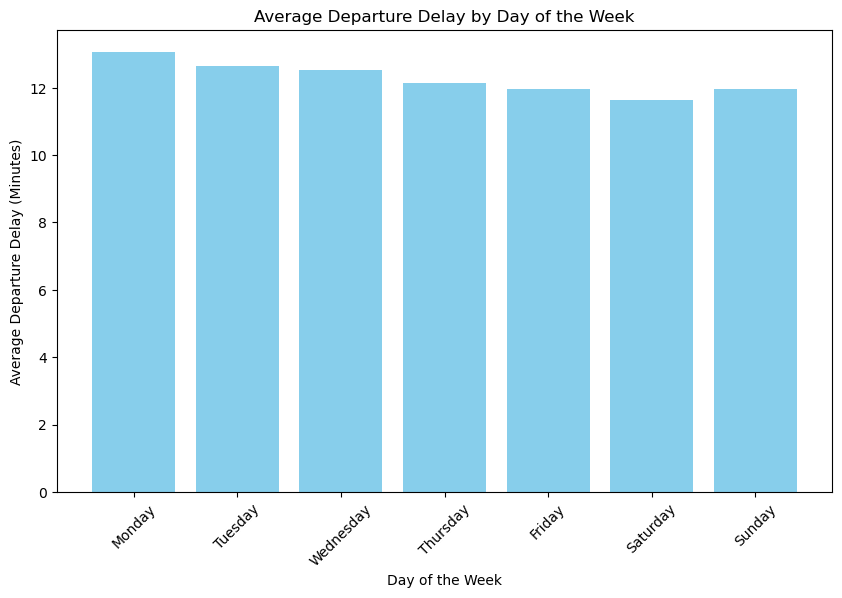

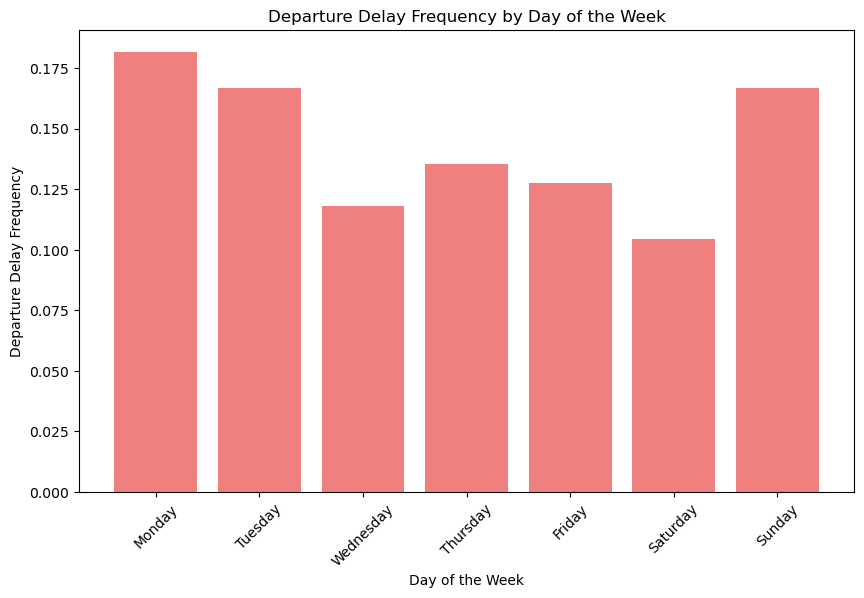

In [23]:
flight_data_df2 = departure_delay_df.copy()

# Convert 'FlightDate' to datetime format
flight_data_df2['FlightDate'] = pd.to_datetime(flight_data_df2['FlightDate'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
flight_data_df2['DayOfWeek'] = flight_data_df2['FlightDate'].dt.dayofweek

# Group by day of the week and calculate average delay and delay frequency
day_of_week_stats = flight_data_df2.groupby('DayOfWeek')['Departure_Delay_Minutes'].agg(['mean', 'count'])

# Rename the days of the week for better visualization
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_stats.index = [day_names[i] for i in day_of_week_stats.index]

# Plot average delay by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats.index, day_of_week_stats['mean'], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (Minutes)")
plt.title("Average Departure Delay by Day of the Week")
plt.xticks(rotation=45)
plt.show()


# Calculate relative arrival delay frequency by day of the week
relative_dep_delay_frequency_days = day_of_week_stats['count'] / day_of_week_stats['count'].sum()


# Plot delay frequency by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_stats.index, relative_dep_delay_frequency_days, color='lightcoral')
plt.xlabel("Day of the Week")
plt.ylabel("Departure Delay Frequency")
plt.title("Departure Delay Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()

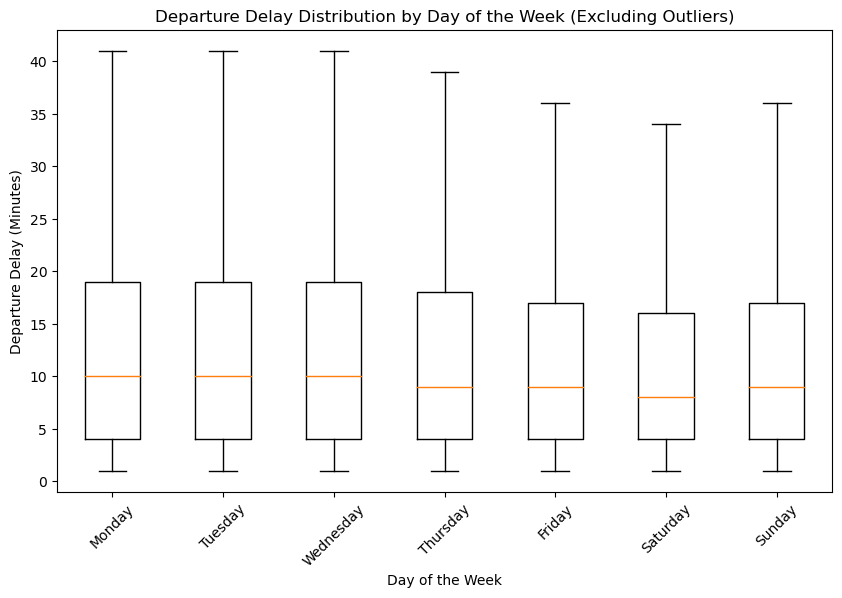

In [36]:
# Create box plots for departure delay by day of the week
plt.figure(figsize=(10, 6))
plt.boxplot([flight_data_df2[flight_data_df2['DayOfWeek'] == i]['Departure_Delay_Minutes'] for i in range(7)],
            labels=day_names, showfliers=False)  # Set showfliers to False to exclude outliers
plt.xlabel("Day of the Week")
plt.ylabel("Departure Delay (Minutes)")
plt.title("Departure Delay Distribution by Day of the Week (Excluding Outliers)")
plt.xticks(rotation=45)
plt.show()